In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

titanic_df = pd.read_csv('./titanic_train.csv')
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [2]:
print('\n ### 학습데이터 정보 ### \n')
print(titanic_df.info())


 ### 학습데이터 정보 ### 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [3]:
# Null값 처리
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace = True)
titanic_df['Cabin'].fillna('N', inplace=True)
titanic_df['Embarked'].fillna('N', inplace=True)
print('데이터 세트 Null 값 개수', titanic_df.isnull().sum().sum()) #sum 한번: column별 합, sum 두번:전체 합

데이터 세트 Null 값 개수 0


In [4]:
print(' Sex값 분포 : \n', titanic_df['Sex'].value_counts())
print('\n Cabin 값 분포 : \n', titanic_df['Cabin'].value_counts())
print('\n Embarked 값 분포 \n', titanic_df['Embarked'].value_counts())

 Sex값 분포 : 
 male      577
female    314
Name: Sex, dtype: int64

 Cabin 값 분포 : 
 N              687
B96 B98          4
G6               4
C23 C25 C27      4
F2               3
F33              3
C22 C26          3
D                3
E101             3
C78              2
B51 B53 B55      2
D20              2
B28              2
C2               2
E121             2
D17              2
B20              2
D26              2
B35              2
C83              2
C125             2
D33              2
F G73            2
D36              2
F4               2
B22              2
E33              2
E24              2
C93              2
C92              2
              ... 
E49              1
E68              1
E63              1
C82              1
B50              1
D10 D12          1
C91              1
B4               1
B39              1
C86              1
A20              1
A7               1
B102             1
B73              1
E46              1
D11              1
C46              1
B80   

In [5]:
#Cabin(선실) 값의 경우 앞글자가 중요해보인다
titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head(3))

0    N
1    C
2    N
Name: Cabin, dtype: object


In [6]:
#1. 성별별 생존 확률
titanic_df.groupby(['Sex', 'Survived'])['Survived'].count()
#0:사망 1:생존

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

C:\Users\ui88g\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


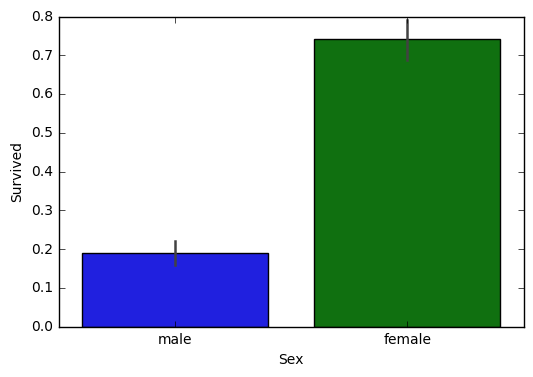

In [7]:
sns.barplot(x='Sex', y='Survived', data=titanic_df)

C:\Users\ui88g\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


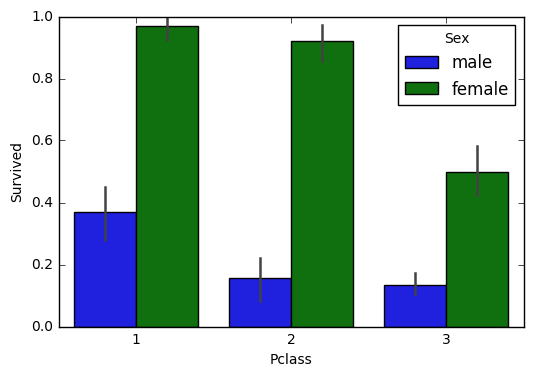

In [8]:
#부자/가난 생존확률 -> 객실등급 이용: Pclass
#성별도 같이 표기해봄
sns.barplot(x='Pclass', y='Survived', hue='Sex', data=titanic_df)

C:\Users\ui88g\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


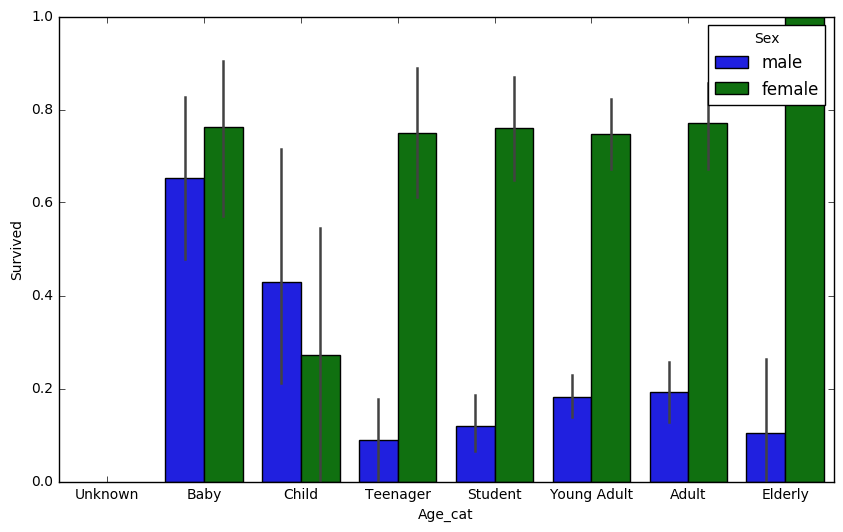

In [9]:
#Age별
#0~5:Baby,6~12:Child,13~18:Teenager, 19~25:Student, 26~35:Young Adult, 36~60:Adult, 61~:Elderly, -1이하 오류값:Unknown
#lambda식 사용
def get_category(age):
    cat=''
    if age <= -1:cat = 'Unknown'
    elif age <= 5: cat = 'Baby'
    elif age<=12: cat = 'Child'
    elif age<=18: cat='Teenager'
    elif age<=25: cat='Student'
    elif age<=35: cat = 'Young Adult'
    elif age<=60: cat = 'Adult'
    else: cat = 'Elderly'
        
    return cat

#막대그래프 크기 더 크게
plt.figure(figsize=(10,6))

#x축값 순차적 표시 위해 설정
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']


titanic_df['Age_cat']=titanic_df['Age'].apply(lambda x : get_category(x))
sns.barplot(x='Age_cat', y='Survived', hue='Sex', data=titanic_df, order=group_names)
titanic_df.drop('Age_cat', axis=1, inplace=True)

sex, age, pclass등이 주요 요인

In [10]:
#남아있는 문자열 feature들을 숫자형 카테고리로 변환 -> scikitlearn의 LabelEncoder class 이용: 0~카테고리수-1까지의 숫자로 변환
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature]=le.transform(dataDF[feature])
        print(le.classes_)
    
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head(3)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3


피쳐 가공 내역 정리/함수로 만들어 재사용할 수 있도록 만들기

In [11]:
#Null처리 함수
def fillna(df):
    df['Age'].fillna(df['Age'].mean(), inplace=True)
    df['Cabin'].fillna('N', inplace=True)
    df['Embarked'].fillna('N', inplace=True)
    df['Fare'].fillna(0, inplace=True)
    
    return df

#머신러닝 알고리즘에 불필요한 속성 제거
def drop_features(df):
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

#레이블 인코딩
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin', 'Sex', 'Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(df[feature])
        df[feature]=le.transform(df[feature])
        print(le.classes_)
        
    return df

#앞에서 설정한 전처리함수 모두 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [12]:
#다시 원본 데이터셋 가공
#survived속성만 분리 -> 결정값 dataset
#나머지 feature dataset
titanic_df = pd.read_csv('titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived', axis=1)

X_titanic_df = transform_features(X_titanic_df)

['A' 'B' 'C' 'D' 'E' 'F' 'G' 'N' 'T']
['female' 'male']
['C' 'N' 'Q' 'S']


In [13]:
#test data set 추출
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, test_size=0.2, random_state=11)

결정트리, 랜덤포레스트 ,로지스틱회귀 이용해볼 것 -> 자세한 알고리즘은 뒤에서.  
일단 적용

In [14]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [15]:
#Classifier class 생성
dt_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#DecisionTreeClassifier 학습/예측/평가
dt_clf.fit(X_train, y_train)
dt_pred = dt_clf.predict(X_test)
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))

#RandomForestClassifier 학습/예측/평가
rf_clf.fit(X_train, y_train)
rf_pred = rf_clf.predict(X_test)
print('RandomForestClassifier 정확도:{0:.4f}'.format(accuracy_score(y_test, rf_pred)))

#LogisticRegression 학습/예측/평가
lr_clf.fit(X_train, y_train)
lr_pred = lr_clf.predict(X_test)
print('LogisticRegression 정확도:{0:.4f}'.format(accuracy_score(y_test, lr_pred)))

DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도:0.8324
LogisticRegression 정확도:0.8659


C:\Users\ui88g\AppData\Roaming\Python\Python35\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\ui88g\AppData\Roaming\Python\Python35\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Fold개수 = 5로 교차검증 실행 cross validation

In [20]:
from sklearn.model_selection import KFold

def exec_kfold(clf, folds=5):
    #fold set = 5인 KFold객체 생성, fold수 만큼 예측 결과 저장 위한 list 객체 생성
    kfold = KFold(n_splits=folds)
    scores=[]

    #KFold 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        #X_train_df 데이터에서 교차검증별 학습/검증 데이터 가리키는 index 생성
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]
        #학습, 예측
        clf.fit(X_train, y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('교차 검증 {0} 정확도 {1:.4f}'.format(iter_count, accuracy))
        print('iter_count:',iter_count)
        #print('train_index, test_index:', (train_index, test_index))
        
    #5개 fold 평균 정확도
    mean_score = np.mean(scores)
    print('평균 정확도 {0:.4f}'.format(mean_score))
    
exec_kfold(dt_clf,folds=5)

교차 검증 0 정확도 0.7542
iter_count: 0
교차 검증 1 정확도 0.7809
iter_count: 1
교차 검증 2 정확도 0.7865
iter_count: 2
교차 검증 3 정확도 0.7697
iter_count: 3
교차 검증 4 정확도 0.8202
iter_count: 4
평균 정확도 0.7823


In [17]:
#cross_val_score 이용한 교차검증
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df, y_titanic_df, cv=5)#평가기준default : accuracy
for iter_count, accuracy in enumerate(scores):
    print('교차검증 {0} 정확도: {1:.4f}'.format(iter_count, accuracy))
    
print('평균 정확도: {0:.4f}'.format(np.mean(scores)))

교차검증 0 정확도: 0.7430
교차검증 1 정확도: 0.7765
교차검증 2 정확도: 0.7809
교차검증 3 정확도: 0.7753
교차검증 4 정확도: 0.8418
평균 정확도: 0.7835


In [22]:
#GridSearchCV - 교차검증과 최적 하이퍼 파라미터 튜닝 둘 DA
#[max_depth, min_samples_split, ,min_samples_leaf]
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2, 3, 5, 10], 'min_samples_split':[2, 3, 5], 'min_samples_leaf':[1, 5, 8]}

grid_dclf=GridSearchCV(dt_clf, param_grid=parameters, scoring='accuracy', cv=5)
grid_dclf.fit(X_train, y_train)

print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도:{0:.4f}'.format(grid_dclf.best_score_))
best_dclf=grid_dclf.best_estimator_

#GridSearchCV의 최적 하이퍼 파라미터로 학습된 Estimator로 예측 및 평가 수행
dpredictions=best_dclf.predict(X_test)
accuracy=accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_split': 2, 'min_samples_leaf': 1}
GridSearchCV 최고 정확도:0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715


C:\Users\ui88g\AppData\Roaming\Python\Python35\site-packages\sklearn\model_selection\_search.py:842: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
